In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'cc9a14ca-f380-450a-94db-0b83028bfc92',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-09-18T14:42:34.889Z', 'error_code': 0, 'error_message': None, 'elapsed': 75, 'credit_count': 1, 'notice': None, 'total_count': 9817}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11702, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [7]:
type(data)

dict

In [8]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11702,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.975579e+07,1.975579e+07,False,NaN,1,NaN,NaN,None,2024-09-18T14:41:00.000Z,59612.563030,3.669391e+10,19.3085,-0.072186,-0.736101,6.939335,2.239731,-10.590798,-8.215944,1.177693e+12,57.3366,1.251864e+12,None,2024-09-18T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:42:40.812287+00:00
1,1027,Ethereum,ETH,ethereum,9306,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203433e+08,1.203433e+08,True,NaN,2,NaN,NaN,None,2024-09-18T14:40:00.000Z,2300.695609,1.526450e+10,7.7660,0.018944,-2.128731,0.491886,-10.557877,-34.317344,-34.641191,2.768732e+11,13.4798,2.768732e+11,None,2024-09-18T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:42:40.812287+00:00
2,825,Tether USDt,USDT,tether,97844,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.188411e+11,1.212378e+11,True,NaN,3,NaN,NaN,None,2024-09-18T14:40:00.000Z,1.000050,5.522892e+10,14.5678,0.008985,-0.000654,0.020999,-0.039427,-0.033020,0.040019,1.188471e+11,5.7861,1.212439e+11,None,2024-09-18T14:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-18 14:42:40.812287+00:00
3,1839,BNB,BNB,bnb,2236,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459338e+08,1.459338e+08,False,NaN,4,NaN,NaN,None,2024-09-18T14:40:00.000Z,541.411989,1.522989e+09,-8.9535,0.258807,-1.263072,5.871216,-0.145324,-8.564434,-9.164639,7.901033e+10,3.8467,7.901033e+10,None,2024-09-18T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:42:40.812287+00:00
4,5426,Solana,SOL,solana,737,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.683689e+08,5.847639e+08,True,NaN,5,NaN,NaN,None,2024-09-18T14:40:00.000Z,128.081547,1.709800e+09,9.6931,-0.792318,-4.440996,-0.754567,-10.038593,-24.103730,-4.828474,5.998941e+10,2.9206,7.489747e+10,None,2024-09-18T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:42:40.812287+00:00
5,3408,USDC,USDC,usd-coin,22124,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.552601e+10,3.552601e+10,False,NaN,6,NaN,NaN,None,2024-09-18T14:40:00.000Z,0.999957,6.315854e+09,15.3527,0.003674,0.003255,0.000670,-0.006555,0.003920,-0.012189,3.552447e+10,1.7295,3.552447e+10,None,2024-09-18T14:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-18 14:42:40.812287+00:00
6,52,XRP,XRP,xrp,1390,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.638602e+10,9.998722e+10,False,NaN,7,NaN,NaN,None,2024-09-18T14:41:00.000Z,0.568050,9.993618e+08,-14.1860,0.070893,-3.851349,8.253906,-1.950308,-4.235653,14.888044,3.203009e+10,1.5594,5.680501e+10,None,2024-09-18T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:42:40.812287+00:00
7,74,Dogecoin,DOGE,dogecoin,1066,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.460085e+11,1.460085e+11,True,NaN,8,NaN,NaN,None,2024-09-18T14:41:00.000Z,0.100471,4.709264e+08,6.0944,-0.117205,-0.782765,2.126008,0.811588,-22.070338,-18.548178,1.466959e+10,0.7142,1.466959e+10,None,2024-09-18T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:42:40.812287+00:00
8,11419,Toncoin,TON,toncoin,556,2021-08-26T13:40:22.000Z,"[pos, layer-1, f

In [14]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'cc9a14ca-f380-450a-94db-0b83028bfc92',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now',utc=True)
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])
    
  

#Appending into a CSV file   
#     df = pd.json_normalize(data['data'])
#     df['timestamp'] = pd.to_datetime('now',utc=True)
#     df
    
#     if not os.path.isfile(r'C:\Users\Bex\Desktop\python API project\API.csv'):
#         df.to_csv(r'C:\Users\Bex\Desktop\python API project\API.csv',header = 'column_names')
#     else:
#         df.to_csv(r'C:\Users\Bex\Desktop\python API project\API.csv',mode = 'a', header = False)

        


In [16]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    
    sleep(60)
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [13]:
df72 = pd.read_csv(r"C:\Users\Bex\Desktop\python API project\API.csv")
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11702,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.975579e+07,1.975579e+07,False,NaN,1,NaN,NaN,NaN,2024-09-18T14:38:00.000Z,59541.891967,3.697389e+10,21.0888,-0.305707,-0.823252,6.632591,2.207130,-10.642964,-8.410455,1.176297e+12,57.2686,1.250380e+12,NaN,2024-09-18T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:40:25.488781+00:00
1,1,1027,Ethereum,ETH,ethereum,9306,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203433e+08,1.203433e+08,True,NaN,2,NaN,NaN,NaN,2024-09-18T14:37:00.000Z,2297.825374,1.533344e+10,8.5050,-0.259442,-2.040670,0.318006,-10.638881,-34.303109,-34.599799,2.765278e+11,13.4549,2.765278e+11,NaN,2024-09-18T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:40:25.488781+00:00
2,2,825,Tether USDt,USDT,tether,97844,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.188411e+11,1.212378e+11,True,NaN,3,NaN,NaN,NaN,2024-09-18T14:37:00.000Z,0.999959,5.547144e+10,15.1545,-0.000096,-0.032137,0.001642,-0.043065,-0.061978,0.043861,1.188363e+11,5.7856,1.212329e+11,NaN,2024-09-18T14:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-18 14:40:25.488781+00:00
3,3,1839,BNB,BNB,bnb,2236,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459338e+08,1.459338e+08,False,NaN,4,NaN,NaN,NaN,2024-09-18T14:37:00.000Z,541.339784,1.525069e+09,-8.7848,0.137705,-0.923808,5.760540,-0.138369,-8.522819,-9.032819,7.899980e+10,3.8461,7.899980e+10,NaN,2024-09-18T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:40:25.488781+00:00
4,4,5426,Solana,SOL,solana,737,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.683689e+08,5.847639e+08,True,NaN,5,NaN,NaN,NaN,2024-09-18T14:37:00.000Z,128.017024,1.728146e+09,12.0696,-0.962977,-3.874978,-0.930929,-10.083612,-24.152327,-4.572204,5.995919e+10,2.9191,7.485974e+10,NaN,2024-09-18T14:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:40:25.488781+00:00
5,5,3408,USDC,USDC,usd-coin,22124,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.552601e+10,3.552601e+10,False,NaN,6,NaN,NaN,NaN,2024-09-18T14:37:00.000Z,0.999878,6.354395e+09,15.9969,-0.005527,0.003858,-0.016825,-0.025693,-0.023700,-0.000909,3.552168e+10,1.7284,3.552168e+10,NaN,2024-09-18T14:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-18 14:40:25.488781+00:00
6,6,52,XRP,XRP,xrp,1390,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.638602e+10,9.998722e+10,False,NaN,7,NaN,NaN,NaN,2024-09-18T14:38:00.000Z,0.567690,1.005019e+09,-13.2603,-0.222159,-3.491682,8.028882,-1.963121,-4.337818,14.905959,3.200976e+10,1.5584,5.676895e+10,NaN,2024-09-18T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:40:25.488781+00:00
7,7,74,Dogecoin,DOGE,dogecoin,1066,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.460085e+11,1.460085e+11,True,NaN,8,NaN,NaN,NaN,2024-09-18T14:38:00.000Z,0.100322,4.739294e+08,7.2371,-0.410704,-0.467337,1.865104,0.724690,-22.044451,-18.542741,1.464787e+10,0.7131,1.464787e+10,NaN,2024-09-18T14:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:40:25.488781+00:00
8,8,11419,Toncoin,TON,toncoin,556,2021-08-26T13:40:22.00

In [19]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11702,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19755790.00000,19755790.00000,False,NaN,1,NaN,NaN,None,2024-09-18T14:42:00.000Z,59652.66095,36678512029.11835,19.10580,-0.09490,-0.69376,7.02968,2.24182,-10.52471,-8.12795,1178485442660.11377,57.33670,1252705879940.12988,None,2024-09-18T14:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:43:54.522820+00:00
1,1027,Ethereum,ETH,ethereum,9306,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120343275.28872,120343275.28872,True,NaN,2,NaN,NaN,None,2024-09-18T14:42:00.000Z,2303.38055,15211061965.96546,6.77920,0.10427,-1.88361,0.66964,-10.54724,-34.28151,-34.50045,277196359422.97992,13.49550,277196359422.97998,None,2024-09-18T14:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:43:54.522820+00:00
2,825,Tether USDt,USDT,tether,97845,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,118841128795.21037,121237807291.46774,True,NaN,3,NaN,NaN,None,2024-09-18T14:42:00.000Z,0.99995,55008651125.94878,13.56610,-0.00416,-0.00789,-0.00427,-0.07325,-0.03840,0.01353,118834666799.67746,5.78170,121231214976.36000,None,2024-09-18T14:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-18 14:43:54.522820+00:00
3,1839,BNB,BNB,bnb,2236,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145933844.74178,145933844.74178,False,NaN,4,NaN,NaN,None,2024-09-18T14:42:00.000Z,541.73748,1522018325.02407,-9.22720,0.32053,-1.17023,5.95479,-0.08419,-8.53181,-9.08416,79057833122.84990,3.84640,79057833122.85001,None,2024-09-18T14:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:43:54.522820+00:00
4,5426,Solana,SOL,solana,737,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468368898.93961,584763924.45053,True,NaN,5,NaN,NaN,None,2024-09-18T14:42:00.000Z,128.18985,1698192818.03115,7.95040,-0.67900,-4.36053,-0.62564,-9.97330,-24.07792,-4.71374,60040138224.71790,2.92110,74960798917.96001,None,2024-09-18T14:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:43:54.522820+00:00
5,3408,USDC,USDC,usd-coin,22124,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35526013046.48371,35526013046.48371,False,NaN,6,NaN,NaN,None,2024-09-18T14:42:00.000Z,0.99987,6267617031.33442,13.82720,-0.00276,-0.00732,-0.01363,-0.02672,-0.00218,-0.03819,35521241008.97356,1.72940,35521241008.97000,None,2024-09-18T14:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-18 14:43:54.522820+00:00
6,52,XRP,XRP,xrp,1390,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56386022594.00000,99987224458.00000,False,NaN,7,NaN,NaN,None,2024-09-18T14:43:00.000Z,0.56862,998192697.87423,-14.74270,0.10942,-4.00641,8.35416,-1.85134,-4.15743,14.99070,32062421194.41145,1.55990,56862356519.23000,None,2024-09-18T14:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-18 14:43:54.522820+00:00
7,74,Dogecoin,DOGE,dogecoin,1066,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146008466383.70523,146008466383.70523,True,NaN,8,NaN,NaN,None,2024-09-18T14:43:00.000Z,0.10072,470417800.87029,5.92030,0.22427,-0.53875,2.48823,1.00322,-22.07547,-18.35957,14705734118.56057,0.71550,14705734

In [18]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [22]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.11762,-0.78697,7.22718,2.23691,-10.47612,-8.00332
Ethereum,0.14620,-1.90503,0.83044,-10.50377,-34.29590,-34.47364
Tether USDt,0.00682,-0.00770,0.00320,-0.03910,-0.03172,0.02846
BNB,0.43772,-1.05795,6.21199,-0.06895,-8.51463,-8.97574
Solana,-0.46294,-4.22269,-0.35606,-9.91701,-24.10751,-4.48617
USDC,0.01138,0.00809,0.00759,-0.00170,0.01041,-0.02364
XRP,0.22173,-3.84826,8.48929,-1.77609,-4.09330,15.07711
Dogecoin,0.37165,-0.52867,2.61955,1.02399,-22.20306,-18.29503
Toncoin,-0.22914,-0.33382,6.49737,-17.98617,-24.50590,-22.51280


In [20]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [23]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.11762
              quote.USD.percent_change_24h    -0.78697
              quote.USD.percent_change_7d      7.22718
              quote.USD.percent_change_30d     2.23691
              quote.USD.percent_change_60d   -10.47612
              quote.USD.percent_change_90d    -8.00332
Ethereum      quote.USD.percent_change_1h      0.14620
              quote.USD.percent_change_24h    -1.90503
              quote.USD.percent_change_7d      0.83044
              quote.USD.percent_change_30d   -10.50377
              quote.USD.percent_change_60d   -34.29590
              quote.USD.percent_change_90d   -34.47364
Tether USDt   quote.USD.percent_change_1h      0.00682
              quote.USD.percent_change_24h    -0.00770
              quote.USD.percent_change_7d      0.00320
              quote.USD.percent_change_30d    -0.03910
              quote.USD.percent_change_60d    -0.03172
              quote.US

In [24]:
type(df4)

pandas.core.series.Series

In [25]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.11762
             quote.USD.percent_change_24h  -0.78697
             quote.USD.percent_change_7d    7.22718
             quote.USD.percent_change_30d   2.23691
             quote.USD.percent_change_60d -10.47612
             quote.USD.percent_change_90d  -8.00332
Ethereum     quote.USD.percent_change_1h    0.14620
             quote.USD.percent_change_24h  -1.90503
             quote.USD.percent_change_7d    0.83044
             quote.USD.percent_change_30d -10.50377
             quote.USD.percent_change_60d -34.29590
             quote.USD.percent_change_90d -34.47364
Tether USDt  quote.USD.percent_change_1h    0.00682
             quote.USD.percent_change_24h  -0.00770
             quote.USD.percent_change_7d    0.00320
             quote.USD.percent_change_30d  -0.03910
             quote.USD.percent_change_60d  -0.03172
             quote.USD.percent_change_90d   0.02846
BNB          quote.USD.percent_change_1h    0.43772
             quote.USD.percent_change_24h  -1.05795
             quote.USD.percent_change_7d    6.21199
             quote.USD.percent_change_30d  -0.06895
             quote.USD.percent_change_60d  -8.51463
             quote.USD.percent_change_90d  -8.97574
Solana       quote.USD.percent_change_1h   -0.46294
             quote.USD.percent_change_24h  -4.22269
             quote.USD.percent_change_7d   -0.35606
             quote.USD.percent_change_30d  -9.91701
             quote.USD.percent_change_60d -24.10751
             quote.USD.percent_change_90d  -4.48617
USDC         quote.USD.percent_change_1h    0.01138
             quote.USD.percent_change_24h   0.00809
             quote.USD.percent_change_7d    0.00759
             quote.USD.percent_change_30d  -0.00170
             quote.USD.percent_change_60d   0.01041
             quote.USD.percent_change_90d  -0.02364
XRP          quote.USD.percent_change_1h    0.22173
             quote.USD.percent_change_24h  -3.84826
             quote.USD.percent_change_7d    8.48929
             quote.USD.percent_change_30d  -1.77609
             quote.USD.percent_change_60d  -4.09330
             quote.USD.percent_change_90d  15.07711
Dogecoin     quote.USD.percent_change_1h    0.37165
             quote.USD.percent_change_24h  -0.52867
             quote.USD.percent_change_7d    2.61955
             quote.USD.percent_change_30d   1.02399
             quote.USD.percent_change_60d -22.20306
             quote.USD.percent_change_90d -18.29503
Toncoin      quote.USD.percent_change_1h   -0.22914
             quote.USD.percent_change_24h  -0.33382
             quote.USD.percent_change_7d    6.49737
             quote.USD.percent_change_30d -17.98617
             quote.USD.percent_change_60d -24.50590
             quote.USD.percent_change_90d -22.51280
TRON         quote.USD.percent_change_1h    0.07987
             quote.USD.percent_change_24h  -0.78156
             quote.USD.percent_change_7d   -1.64725
             quote.USD.percent_change_30d   8.32676
             quote.USD.percent_change_60d  11.46631
             quote.USD.percent_change_90d  28.44422
Cardano      quote.USD.percent_change_1h    0.03780
             quote.USD.percent_change_24h  -2.07465
             quote.USD.percent_change_7d   -0.35258
             quote.USD.percent_change_30d  -0.09289
             quote.USD.percent_change_60d -23.60787
             quote.USD.percent_change_90d -13.95451
Avalanche    quote.USD.percent_change_1h   -0.17257
             quote.USD.percent_change_24h  -4.38621
             quote.USD.percent_change_7d    0.52148
             quote.USD.percent_change_30d  12.65707
             quote.USD.percent_change_60d -18.00328
             quote.USD.percent_change_90d -15.15249
Shiba Inu    quote.USD.percent_change_1h   -0.10651
             quote.USD.percent_change_24h  -2.20358
             quote.USD.percent_change_7d    0.92159
             quote.USD.percent_change_30d

In [29]:
index = pd.Index(range(len(df5)))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.11762
1,Bitcoin,quote.USD.percent_change_24h,-0.78697
2,Bitcoin,quote.USD.percent_change_7d,7.22718
3,Bitcoin,quote.USD.percent_change_30d,2.23691
4,Bitcoin,quote.USD.percent_change_60d,-10.47612
5,Bitcoin,quote.USD.percent_change_90d,-8.00332
6,Ethereum,quote.USD.percent_change_1h,0.14620
7,Ethereum,quote.USD.percent_change_24h,-1.90503
8,Ethereum,quote.USD.percent_change_7d,0.83044
9,Ethereum,quote.USD.percent_change_30d,-10.50377


In [35]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.11762
1,Bitcoin,quote.USD.percent_change_24h,-0.78697
2,Bitcoin,quote.USD.percent_change_7d,7.22718
3,Bitcoin,quote.USD.percent_change_30d,2.23691
4,Bitcoin,quote.USD.percent_change_60d,-10.47612
5,Bitcoin,quote.USD.percent_change_90d,-8.00332
6,Ethereum,quote.USD.percent_change_1h,0.14620
7,Ethereum,quote.USD.percent_change_24h,-1.90503
8,Ethereum,quote.USD.percent_change_7d,0.83044
9,Ethereum,quote.USD.percent_change_30d,-10.50377


In [37]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.11762
1,Bitcoin,24h,-0.78697
2,Bitcoin,7d,7.22718
3,Bitcoin,30d,2.23691
4,Bitcoin,60d,-10.47612
5,Bitcoin,90d,-8.00332
6,Ethereum,1h,0.14620
7,Ethereum,24h,-1.90503
8,Ethereum,7d,0.83044
9,Ethereum,30d,-10.50377


In [32]:
import seaborn as sns
import matplotlib.pyplot as  plt

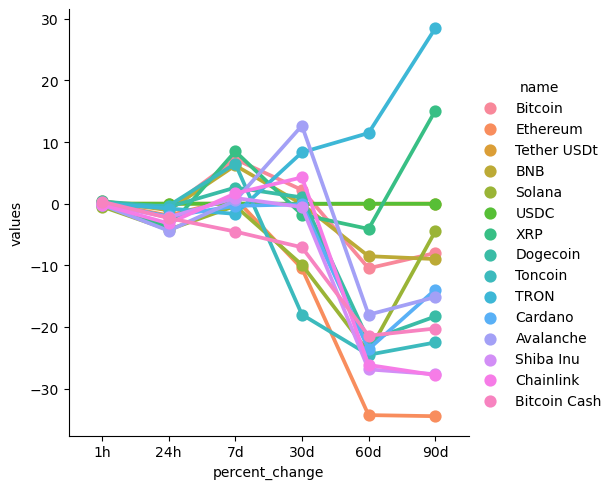

In [38]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [52]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query('name=="Bitcoin"')
df10

,name,quote.USD.price,timestamp
0,Bitcoin,59652.66095,2024-09-18 14:43:54.522820+00:00
0,Bitcoin,59691.00009,2024-09-18 14:47:21.088058+00:00
0,Bitcoin,59739.07590,2024-09-18 14:48:21.542995+00:00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

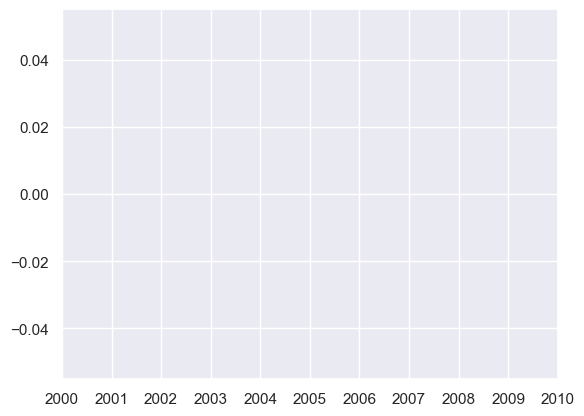

In [54]:
sns.set_theme(style='darkgrid')


sns.lineplot(x='timestamp', y ='quote.USD.price', data = df10)
